In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml



In [5]:
# 1. Eksplorasi Dataset
mnist = datasets.fetch_openml("mnist_784")
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")

c:\Users\RIZKY\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


In [6]:
import pandas as pd

# Data kelas Anda dalam bentuk dictionary
data = {
    'Label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Jumlah Data': [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung total jumlah data
total_data = df['Jumlah Data'].sum()

# Menambahkan kolom "Persentase" yang berisi persentase distribusi
df['Persentase'] = (df['Jumlah Data'] / total_data) * 100

# Menampilkan DataFrame
print(df)

   Label  Jumlah Data  Persentase
0      0         6903    9.861429
1      1         7877   11.252857
2      2         6990    9.985714
3      3         7141   10.201429
4      4         6824    9.748571
5      5         6313    9.018571
6      6         6876    9.822857
7      7         7293   10.418571
8      8         6825    9.750000
9      9         6958    9.940000


In [7]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [8]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

c:\Users\RIZKY\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


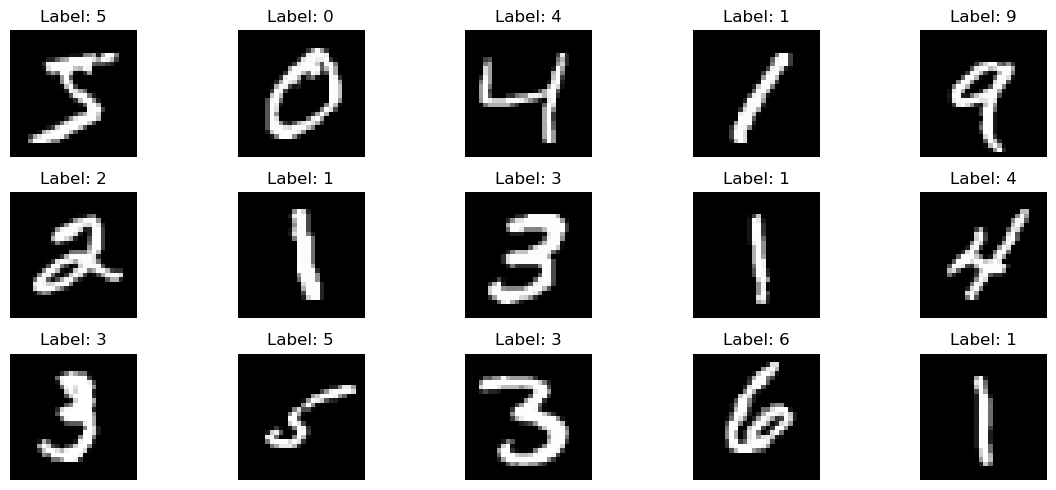

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [11]:
# pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,random_state=42)

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB()

In [15]:
y_train_pred = mnb.predict(Xtrain)

# Evaluasi akurasi training
acc_train = accuracy_score(ytrain, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(Xtest)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(ytest, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.8266785714285714
Hasil akurasi data test: 0.829


In [16]:
# pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3,random_state=42)

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB()

In [18]:
y_train_pred = mnb.predict(Xtrain)

# Evaluasi akurasi training
acc_train = accuracy_score(ytrain, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(Xtest)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(ytest, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.8278979591836735
Hasil akurasi data test: 0.8257142857142857


In [19]:
# pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1,random_state=42)

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB()

In [21]:
y_train_pred = mnb.predict(Xtrain)

# Evaluasi akurasi training
acc_train = accuracy_score(ytrain, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(Xtest)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(ytest, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.8268412698412698
Hasil akurasi data test: 0.8294285714285714
